In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

--- 
 
 
# Gradient Boosting, briefly Check Gorrelation of General Data
  
> #### We want to see if there is a correlation between our factors and `normalized_ranking`
>We can use Gradient Boosting to determine classification score
> 
>> We use the data visualized in `cleaned_gen_match_stats.csv` from [2_comprehensive_data_cleaning_erangel_gen](https://github.com/Gyanroh/SC1015_PUBG_Project/blob/main/2_Cleaning_Data/2_comprehensive_data_cleaning_erangel_gen.ipynb)
>><br>First, we take a sample of 20000 to speed up processing time

In [2]:
erangel_gen = pd.read_csv('cleaned_gen_match_stats.csv')

In [3]:
erangel_gen['normalized_ranking'] = (erangel_gen['normalized_ranking'] * 100).round(3)
erangel_gen.describe().applymap(lambda x: f"{x:0.3f}")

,game_size,party_size,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,normalized_ranking
count,11821822.000,11821822.000,11821822.000,11821822.000,11821822.000,11821822.000,11821822.000,11821822.000,11821822.000
mean,45.773,2.756,0.410,1132.549,1227.639,102.196,0.683,764.021,49.755
std,23.231,1.216,0.647,1869.061,1198.361,121.626,1.120,563.318,28.682
min,24.000,1.000,0.000,0.000,1.000,0.000,0.000,50.405,0.000
25%,27.000,2.000,0.000,0.000,219.673,0.000,0.000,244.813,25.000
50%,43.000,2.000,0.000,0.000,821.483,72.000,0.000,615.374,51.000
75%,50.000,4.000,1.000,1838.660,1986.821,152.000,1.000,1251.628,75.000
max,96.000,4.000,2.000,14974.475,36748.125,3646.000,35.000,2373.716,98.900


In [9]:
erangel_gen = erangel_gen.sample(n = 20000) 
#sample 2 million data points


In [10]:
TargetVariable='normalized_ranking'
Predictors=["game_size", "player_kills", "player_survive_time", "player_dmg", "player_dbno", "player_dist_walk", "player_dist_ride"]
erangel_gen_dummy=pd.get_dummies(erangel_gen)
X=erangel_gen_dummy[Predictors].values
y=erangel_gen_dummy[TargetVariable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

---


# Train & Test 

>  We use target varible `normalized_ranking`
> <br>We correlate it with `"game_size", "player_kills", "player_survive_time", "player_dmg", "player_dbno", "player_dist_walk", "player_dist_ride"`

In [11]:
# Standardize the dataset
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

gbr_erang = GradientBoostingRegressor()
gbr_erang.fit(X_train_std, y_train)

y_predictor = gbr_erang.predict(X_test_std)
print("Model Accuracy: %.4f" % gbr_erang.score(X_test_std, y_test))

# Create the mean squared error
mse = mean_squared_error(y_test, gbr_erang.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.5f}".format(mse))

Model Accuracy: 0.7866
The mean squared error (MSE) on test set: 175.97509


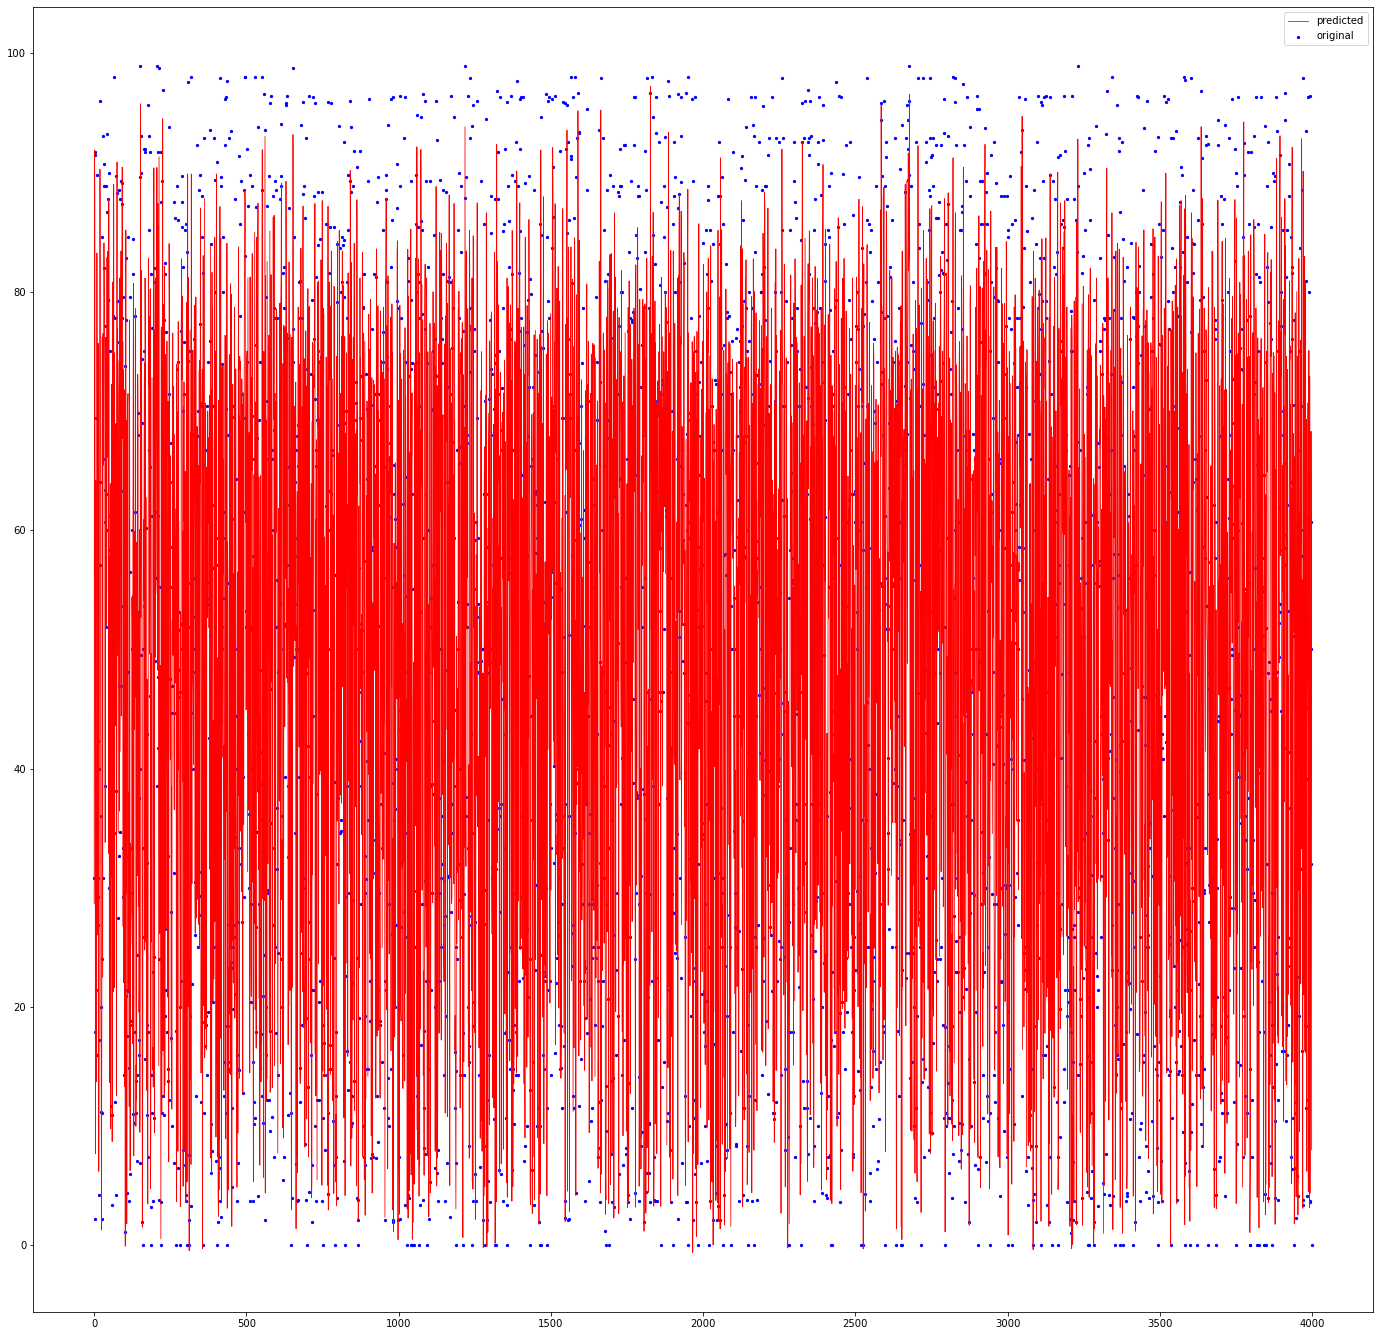

In [12]:
x_ax = range(len(y_test))
 plt.plot(x_ax, y_predictor, lw=0.8, color="red", label="predicted")
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.legend()
plt.show()

In [13]:
print("Classification Score for Train \t:", gbr_erang.score(X_train_std,y_train))
print("Classification Score for Test \t:", gbr_erang.score(X_test_std,y_test))

Classification Score for Train 	: 0.786597062925093
Classification Score for Test 	: 0.7866494696788799


---


# Conclusion

>  A classification score of `0.7866` is pretty decent. We can continue with other machine learning techniques like linear regression for other information